In [2]:
from magnetic_field import *
from utils import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

exact_value = -8.56677223
bn_list = create_bn_list(7)

In [3]:
def run(method, nqubit, depth_list, bn_type=None, bn_range=None, bn_value=None):
    results = []
    for depth in depth_list:
        result = getResult(nqubit, depth, method, bn_type, bn_range, bn_value)
        if result == None:
            continue
#         print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))
        results.append(result)
    return results

In [4]:
vqe_results = []
nqubit = 7
method = 'indirect_ising'
depth_list = [16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random', 2, None))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', None, bn))

method = 'indirect_xy'
depth_list = [12,16,20,24,28,32]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random', 2, None))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', None, bn))

method = 'indirect_xyz'
depth_list = [8,12,16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, None, None, None))

In [5]:
for result in vqe_results:
        if result == None:
            continue
        print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_range"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))

indirect_ising,16,static_random,2,None,-7.287830337438277,6.0000000000001625,-5.757172360781831,1.4199556359781769,101.0,35092.0,9445.48,6210.143625521072
indirect_ising,20,static_random,2,None,-8.03340542665132,-1.502847681354614,-6.238902538036034,1.0760817234311928,314.0,46605.0,14136.13,9131.211051832062
indirect_ising,24,static_random,2,None,-8.318740232513381,-4.5377137218299435,-6.697317384924971,0.8836173644535855,5741.0,69575.0,21020.62,12658.475404076116
indirect_ising,28,static_random,2,None,-8.236665021323399,6.000000000000198,-6.682563315322366,1.6528735149699865,173.0,86125.0,27649.24,18748.941789402408
indirect_ising,16,static,None,-1.0,-6.63089462004592,-5.793305658500772,-6.127748821460973,0.2623556184076094,2342.0,8248.0,4639.2,1449.941157426742
indirect_ising,20,static,None,-1.0,-7.8496279134924665,-4.869054809534436,-6.935773718216952,0.9527427838951092,5515.0,12156.0,7741.7,1909.1862166902422
indirect_ising,24,static,None,-1.0,-8.005978587519097,-7.363389463996913,

In [56]:
## x axis: layer, y axis: expectation value
plot_list = {}
for result in vqe_results:
    if result['bn_type'] == 'static_random':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
            plot_list["%s-iter-min" % result['method']] = [result['iter']['min']]
            plot_list["%s-iter-max" % result['method']] = [result['iter']['max']]
            plot_list["%s-iter-mean" % result['method']] = [result['iter']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])
            plot_list["%s-iter-min" % result['method']].append(result['iter']['min'])
            plot_list["%s-iter-max" % result['method']].append(result['iter']['max'])
            plot_list["%s-iter-mean" % result['method']].append(result['iter']['mean'])
    elif result['method'] == 'indirect_xyz':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
            plot_list["%s-iter-min" % result['method']] = [result['iter']['min']]
            plot_list["%s-iter-max" % result['method']] = [result['iter']['max']]
            plot_list["%s-iter-mean" % result['method']] = [result['iter']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])
            plot_list["%s-iter-min" % result['method']].append(result['iter']['min'])
            plot_list["%s-iter-max" % result['method']].append(result['iter']['max'])
            plot_list["%s-iter-mean" % result['method']].append(result['iter']['mean'])

def create_expectation_graph(title, y_min=-9.0, y_max=-5.0):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(y_min, y_max)

def create_iteration_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("iteration")


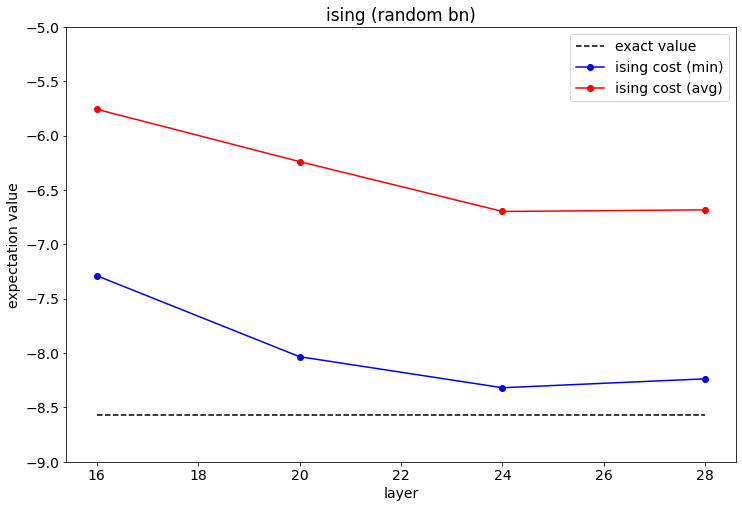

In [58]:
create_expectation_graph("ising (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_ising-depth']), max(plot_list['indirect_ising-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-min'], marker='o', color='blue', label='ising cost (min)')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-mean'], marker='o', color='red', label='ising cost (avg)')
plt.legend()
plt.savefig('image/ising_random_bn_energy.png')

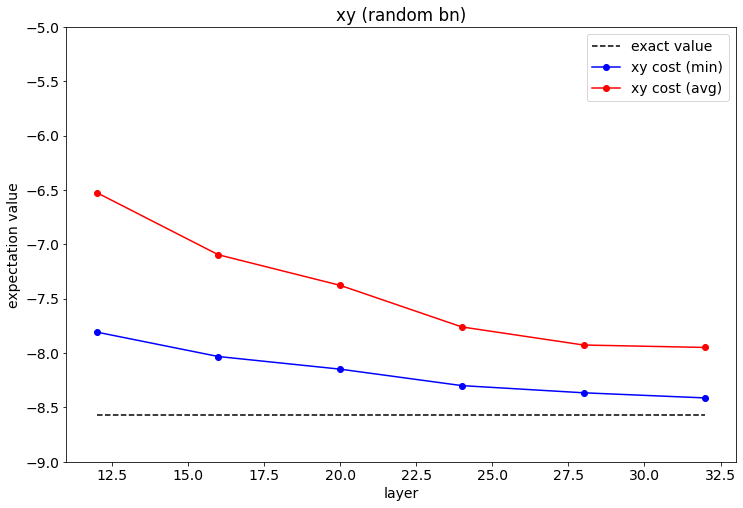

In [59]:
create_expectation_graph("xy (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xy-depth']), max(plot_list['indirect_xy-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-min'], marker='o', color='blue', label='xy cost (min)')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-mean'], marker='o', color='red', label='xy cost (avg)')
plt.legend()
plt.savefig('image/xy_random_bn_energy.png')

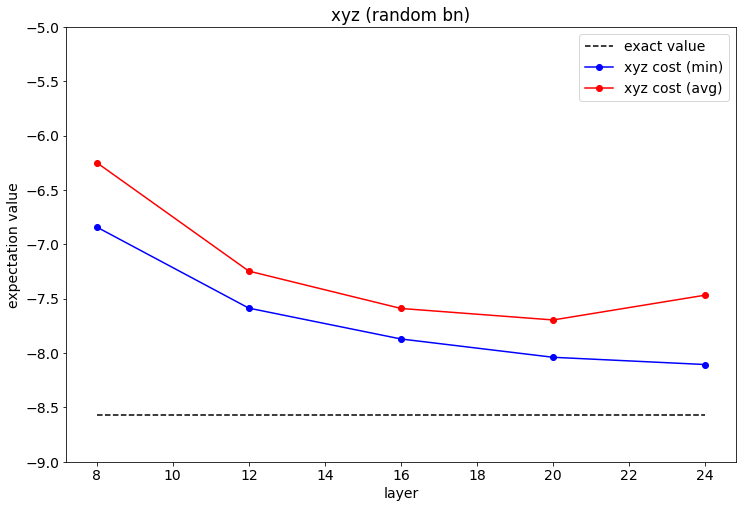

In [60]:
create_expectation_graph("xyz (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xyz-depth']), max(plot_list['indirect_xyz-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-min'], marker='o', color='blue', label='xyz cost (min)')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-mean'], marker='o', color='red', label='xyz cost (avg)')
plt.legend()
plt.savefig('image/xyz_random_bn_energy.png')

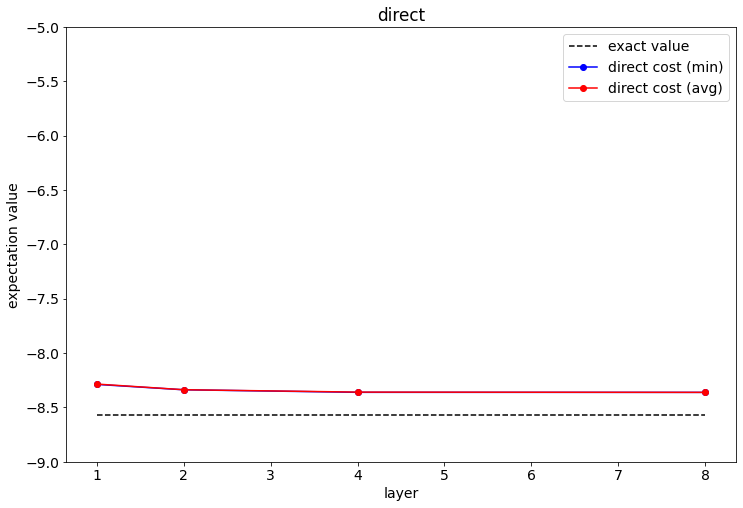

In [61]:
## 直接制御
method = 'direct'
depth_list = [1,2,4,8]
direct_results = run(method, nqubit, depth_list)

d_plot_list = {}

for result in direct_results:
    if 'depth' not in d_plot_list.keys():
        d_plot_list["depth"] = [result['depth']]
        d_plot_list["cost-min"] = [result['cost']['min']]
        d_plot_list["cost-mean"] = [result['cost']['mean']]
        d_plot_list["iter-min"] = [result['iter']['min']]
        d_plot_list["iter-max"] = [result['iter']['max']]
        d_plot_list["iter-mean"] = [result['iter']['mean']]
    else:
        d_plot_list["depth"].append(result['depth'])
        d_plot_list["cost-min"].append(result['cost']['min'])
        d_plot_list["cost-mean"].append(result['cost']['mean'])
        d_plot_list["iter-min"].append(result['iter']['min'])
        d_plot_list["iter-max"].append(result['iter']['max'])
        d_plot_list["iter-mean"].append(result['iter']['mean'])

create_expectation_graph("direct")
plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(d_plot_list['depth'], d_plot_list['cost-min'], marker='o', color='blue', label='direct cost (min)')
plt.plot(d_plot_list['depth'], d_plot_list['cost-mean'], marker='o', color='red', label='direct cost (avg)')
plt.legend()
plt.savefig('image/direct_energy.png')

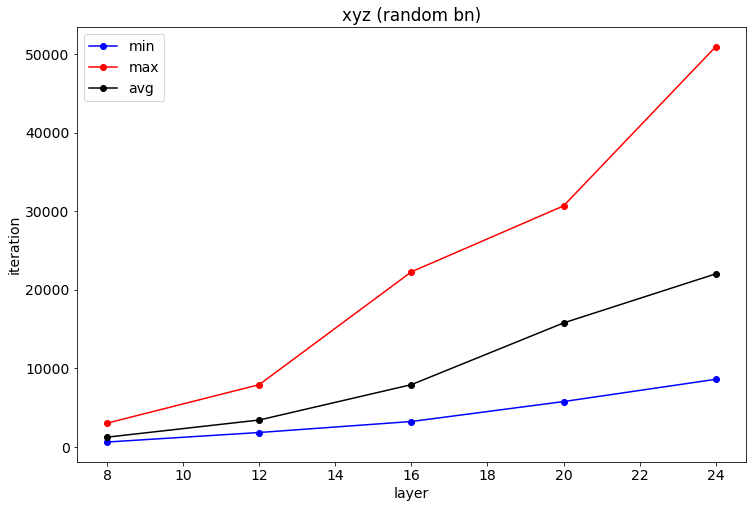

In [62]:
create_iteration_graph("xyz (random bn)")
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-iter-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-iter-max'], marker='o', color='red', label='max')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/xyz_random_bn_iteration.png')

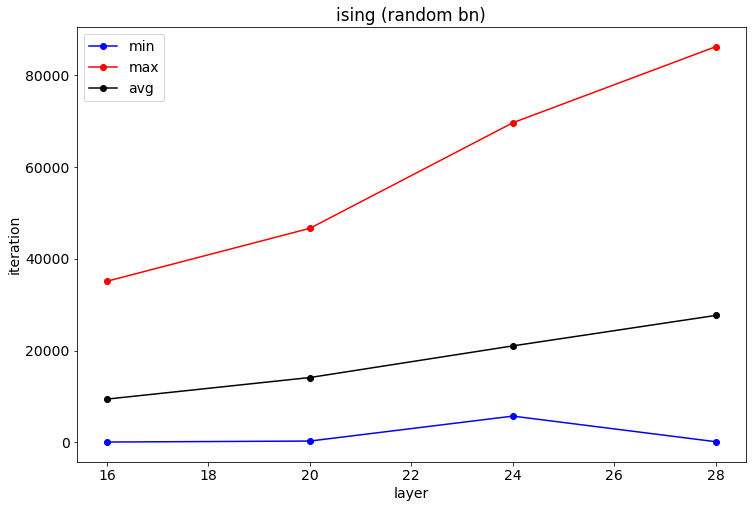

In [63]:
create_iteration_graph("ising (random bn)")
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-iter-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-iter-max'], marker='o', color='red', label='max')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/ising_random_bn_iteration.png')

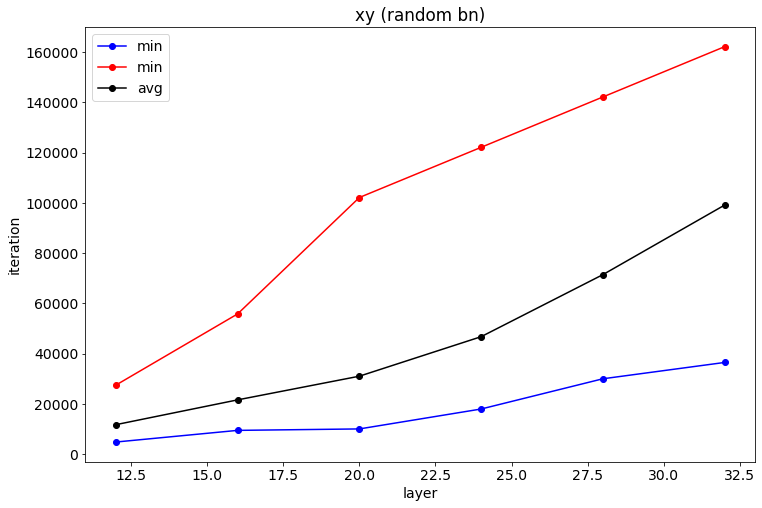

In [64]:
create_iteration_graph("xy (random bn)")
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-iter-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-iter-max'], marker='o', color='red', label='min')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/xy_random_bn_iteration.png')

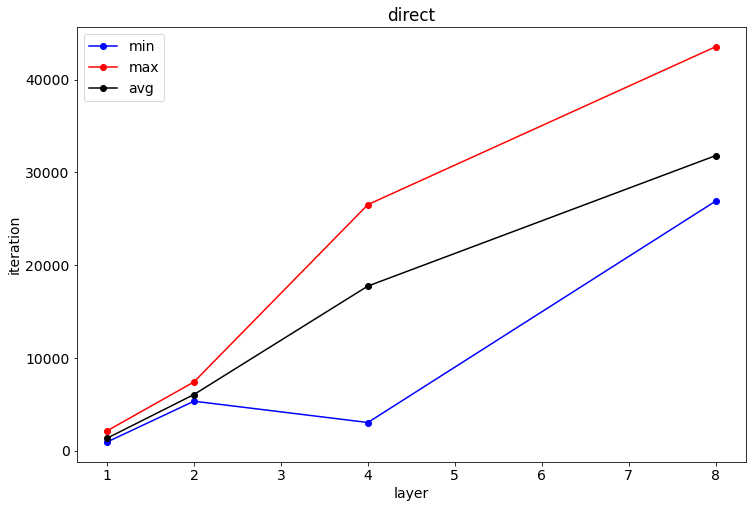

In [65]:
create_iteration_graph("direct")
plt.plot(d_plot_list['depth'], d_plot_list['iter-min'], marker='o', color='blue', label='min')
plt.plot(d_plot_list['depth'], d_plot_list['iter-max'], marker='o', color='red', label='max')
plt.plot(d_plot_list['depth'], d_plot_list['iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/direct_iteration.png')

In [66]:
random_results = []
nqubit = 7

method = 'indirect_xy'
random_results.extend(run(method, nqubit, [12], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [12], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [12], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [12], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [12], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [12], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [12], 'static_random', 8, None))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [16], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [16], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [16], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [16], 'static_random', 8, None))
random_results.extend(run(method, nqubit, [20], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [20], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [20], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [20], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 8, None))
random_results.extend(run(method, nqubit, [24], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [24], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [24], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [24], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [24], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [24], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [24], 'static_random', 8, None))

bn_plot_list = {}
for result in random_results:
    if result['bn_type'] == 'static_random':
        if ("%s-%s-depth" % (result['method'], result['bn_range'])) not in bn_plot_list.keys():
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_range'])] = [result['depth']]
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_range'])] = [result['cost']['min']]
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_range'])] = [result['cost']['mean']]
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_range'])] = [result['iter']['min']]
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_range'])] = [result['iter']['max']]
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_range'])] = [result['iter']['mean']]
        else:
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_range'])].append(result['depth'])
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_range'])].append(result['cost']['min'])
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_range'])].append(result['cost']['mean'])
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_range'])].append(result['iter']['min'])
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_range'])].append(result['iter']['max'])
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_range'])].append(result['iter']['mean'])
    elif result['bn_type'] == 'static':
        if ("%s-%s-depth" % (result['method'], result['bn_value'])) not in bn_plot_list.keys():
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_value'])] = [result['depth']]
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_value'])] = [result['cost']['min']]
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_value'])] = [result['cost']['mean']]
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_value'])] = [result['iter']['min']]
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_value'])] = [result['iter']['max']]
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_value'])] = [result['iter']['mean']]
        else:
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_value'])].append(result['depth'])
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_value'])].append(result['cost']['min'])
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_value'])].append(result['cost']['mean'])
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_value'])].append(result['iter']['min'])
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_value'])].append(result['iter']['max'])
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_value'])].append(result['iter']['mean'])
bn_plot_list

{'indirect_xy-0.09999999999999964-depth': [12, 16, 20],
 'indirect_xy-0.09999999999999964-cost-min': [-7.079323242946172,
  -7.3900813008357,
  -7.6043757377050945],
 'indirect_xy-0.09999999999999964-cost-mean': [-6.315789060624623,
  -6.527283333937206,
  -7.1323160292426895],
 'indirect_xy-0.09999999999999964-iter-min': [4754.0, 8758.0, 10282.0],
 'indirect_xy-0.09999999999999964-iter-max': [11528.0, 14662.0, 21223.0],
 'indirect_xy-0.09999999999999964-iter-mean': [7410.4, 11843.8, 15562.5],
 'indirect_xy-0.49999999999999956-depth': [12, 16, 20],
 'indirect_xy-0.49999999999999956-cost-min': [-7.12056751220044,
  -7.527404173652685,
  -7.720480279248854],
 'indirect_xy-0.49999999999999956-cost-mean': [-6.484057080232878,
  -6.654188624137499,
  -6.974808676249881],
 'indirect_xy-0.49999999999999956-iter-min': [5753.0, 7360.0, 9344.0],
 'indirect_xy-0.49999999999999956-iter-max': [11472.0, 19594.0, 28169.0],
 'indirect_xy-0.49999999999999956-iter-mean': [8164.7, 12560.4, 16186.7],
 'in

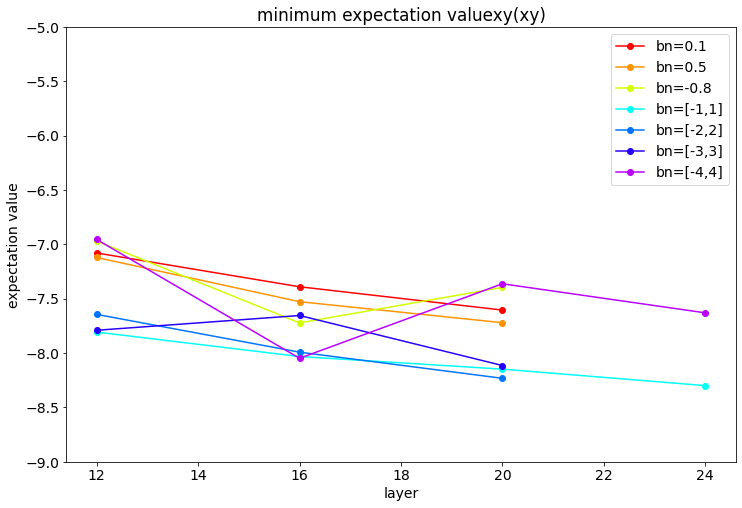

In [67]:
create_expectation_graph("minimum expectation valuexy(xy)")
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_01.value)], bn_plot_list['indirect_xy-%s-cost-min' % (MagneticField.BN_01.value)], marker='o', color=cm.hsv(0/10.0), label='bn=0.1')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_05.value)], bn_plot_list['indirect_xy-%s-cost-min' % (MagneticField.BN_05.value)], marker='o', color=cm.hsv(1/10.0), label='bn=0.5')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_MINUS_08.value)], bn_plot_list['indirect_xy-%s-cost-min' % (MagneticField.BN_MINUS_08.value)], marker='o', color=cm.hsv(2/10.0), label='bn=-0.8')
plt.plot(bn_plot_list['indirect_xy-2-depth'], bn_plot_list['indirect_xy-2-cost-min'], marker='o', color=cm.hsv(5/10.0), label='bn=[-1,1]')
plt.plot(bn_plot_list['indirect_xy-4-depth'], bn_plot_list['indirect_xy-4-cost-min'], marker='o', color=cm.hsv(6/10.0), label='bn=[-2,2]')
plt.plot(bn_plot_list['indirect_xy-6-depth'], bn_plot_list['indirect_xy-6-cost-min'], marker='o', color=cm.hsv(7/10.0), label='bn=[-3,3]')
plt.plot(bn_plot_list['indirect_xy-8-depth'], bn_plot_list['indirect_xy-8-cost-min'], marker='o', color=cm.hsv(8/10.0), label='bn=[-4,4]')
plt.legend()
plt.savefig('image/xy_compare_bn_energy_min.png')

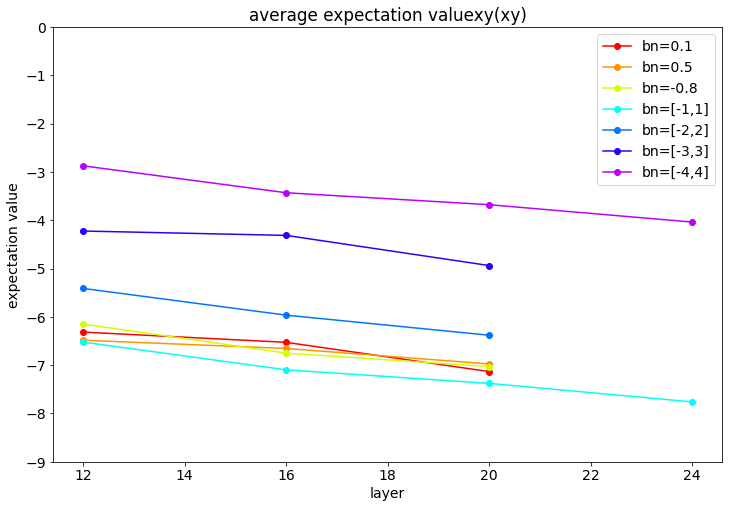

In [69]:
create_expectation_graph("average expectation valuexy(xy)", -9.0, 0)
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_01.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (MagneticField.BN_01.value)], marker='o', color=cm.hsv(0/10.0), label='bn=0.1')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_05.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (MagneticField.BN_05.value)], marker='o', color=cm.hsv(1/10.0), label='bn=0.5')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_MINUS_08.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (MagneticField.BN_MINUS_08.value)], marker='o', color=cm.hsv(2/10.0), label='bn=-0.8')
plt.plot(bn_plot_list['indirect_xy-2-depth'], bn_plot_list['indirect_xy-2-cost-mean'], marker='o', color=cm.hsv(5/10.0), label='bn=[-1,1]')
plt.plot(bn_plot_list['indirect_xy-4-depth'], bn_plot_list['indirect_xy-4-cost-mean'], marker='o', color=cm.hsv(6/10.0), label='bn=[-2,2]')
plt.plot(bn_plot_list['indirect_xy-6-depth'], bn_plot_list['indirect_xy-6-cost-mean'], marker='o', color=cm.hsv(7/10.0), label='bn=[-3,3]')
plt.plot(bn_plot_list['indirect_xy-8-depth'], bn_plot_list['indirect_xy-8-cost-mean'], marker='o', color=cm.hsv(8/10.0), label='bn=[-4,4]')
plt.legend()
plt.savefig('image/xy_compare_bn_energy_mean.png')

In [54]:
bn_plot_list['indirect_xy-8-cost-mean']

[-2.875277487955647,
 -3.4318598737625905,
 -3.679153316848689,
 -4.038213724078946]